In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('adult.csv')

| العمود         | الوصف                                               |
| -------------- | --------------------------------------------------- |
| age            | عمر الشخص بالسنين                                   |
| workclass      | نوع جهة العمل (حكومي، خاص، عمل حر…)                 |
| fnlwgt         | وزن إحصائي يمثل عدد الأشخاص المشابهين له في المجتمع |
| education      | أعلى مستوى تعليمي وصل له                            |
| education.num  | تمثيل رقمي لمستوى التعليم                           |
| marital.status | الحالة الاجتماعية                                   |
| occupation     | نوع الوظيفة                                         |
| relationship   | علاقة الشخص داخل الأسرة                             |
| race           | العِرق                                              |
| sex            | النوع (ذكر / أنثى)                                  |
| capital.gain   | الأرباح الرأسمالية                                  |
| capital.loss   | الخسائر الرأسمالية                                  |
| hours.per.week | عدد ساعات العمل في الأسبوع                          |
| native.country | البلد الأصلية                                       |
| income         | الدخل السنوي (<=50K أو >50K)                        |


In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
coloms_drop=['fnlwgt','education','relationship','native.country']

In [5]:
df.drop(columns=coloms_drop, axis=1, inplace=True)

In [6]:
import pickle

In [7]:
pickle.dump(coloms_drop, open('coloms_drop.pkl', 'wb'))

In [8]:
df.head()

,age,workclass,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,?,9,Widowed,?,White,Female,0,4356,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,White,Female,0,4356,18,<=50K
2,66,?,10,Widowed,?,Black,Female,0,4356,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,White,Female,0,3900,40,<=50K


In [9]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:
df.head()

,age,workclass,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,9,Widowed,NaN,White,Female,0,4356,40,<=50K
1,82,Private,9,Widowed,Exec-managerial,White,Female,0,4356,18,<=50K
2,66,NaN,10,Widowed,NaN,Black,Female,0,4356,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,White,Female,0,3900,40,<=50K


In [12]:
df.shape

(32561, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   capital.gain    32561 non-null  int64 
 8   capital.loss    32561 non-null  int64 
 9   hours.per.week  32561 non-null  int64 
 10  income          32561 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


In [14]:
df.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
age                  0
education.num        0
marital.status       0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['workclass','occupation']] = imputer.fit_transform(df[['workclass','occupation']])


In [16]:
pickle.dump(imputer, open('imputer_workclass_occupation.pkl', 'wb'))

In [17]:
df.isna().sum()

age               0
workclass         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(4879)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.reset_index(drop=True, inplace=True)

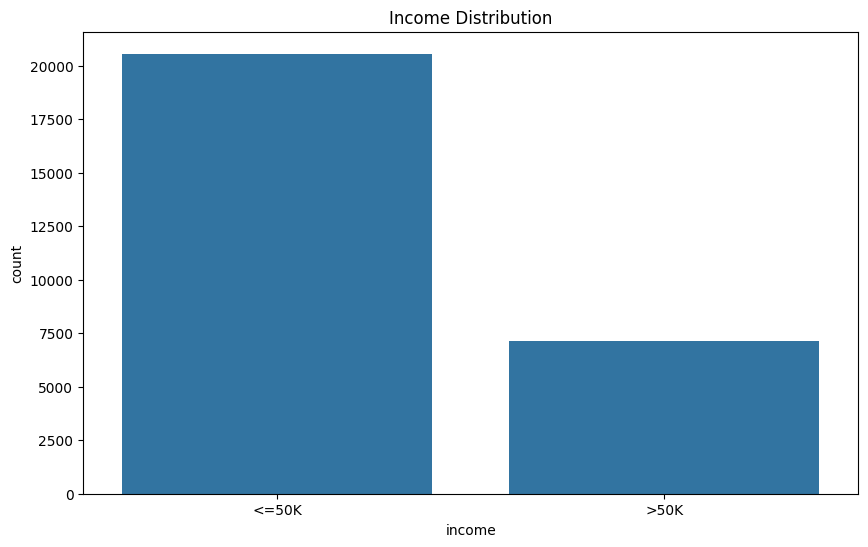

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

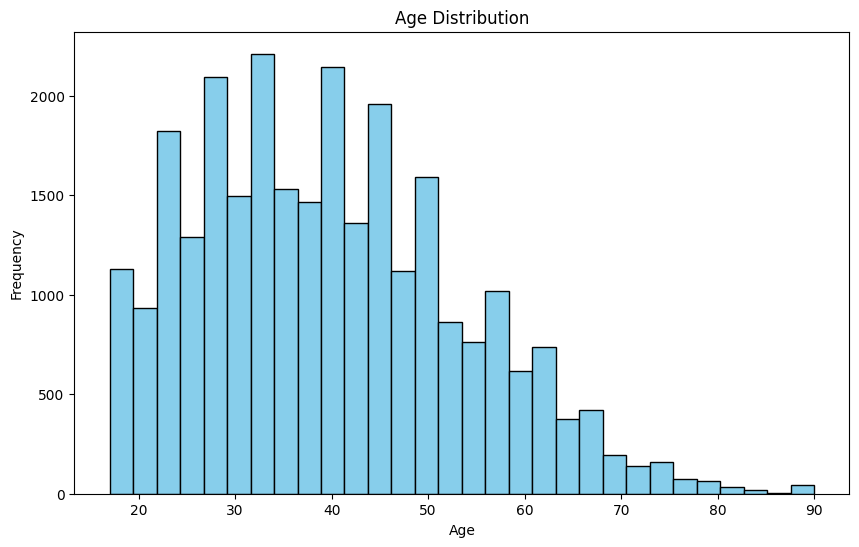

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')   
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

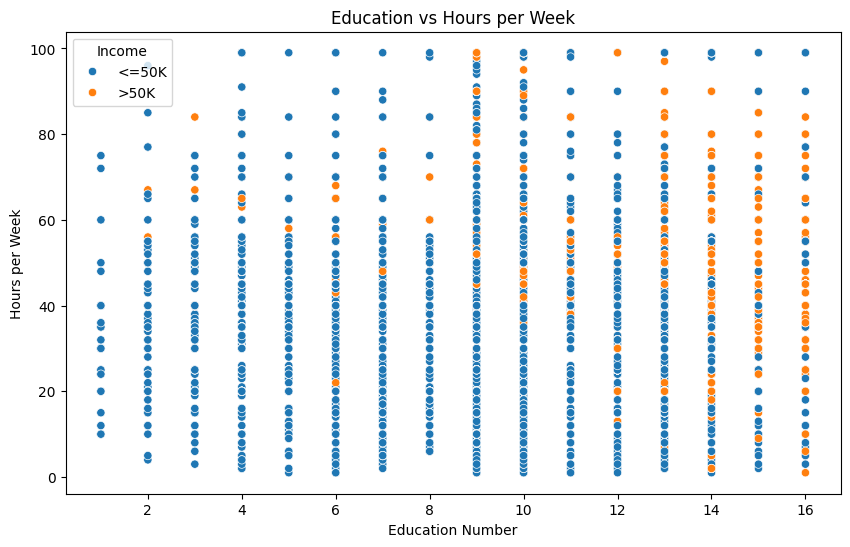

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='education.num', y='hours.per.week', hue='income', data=df)
plt.title('Education vs Hours per Week')
plt.xlabel('Education Number')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.show()

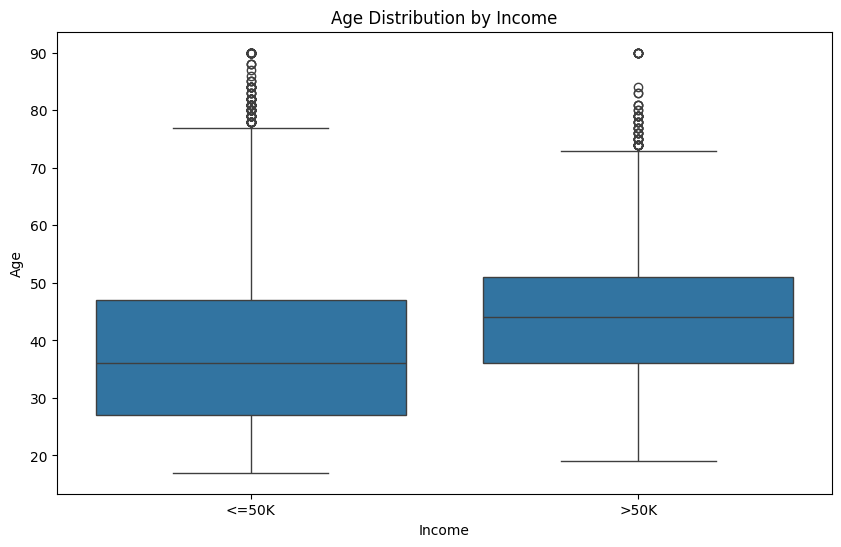

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

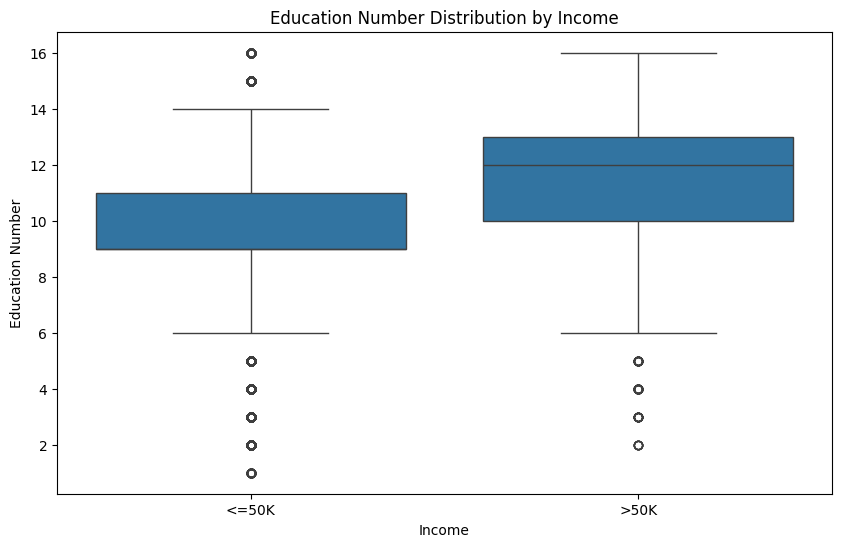

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='education.num', data=df)
plt.title('Education Number Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.show()

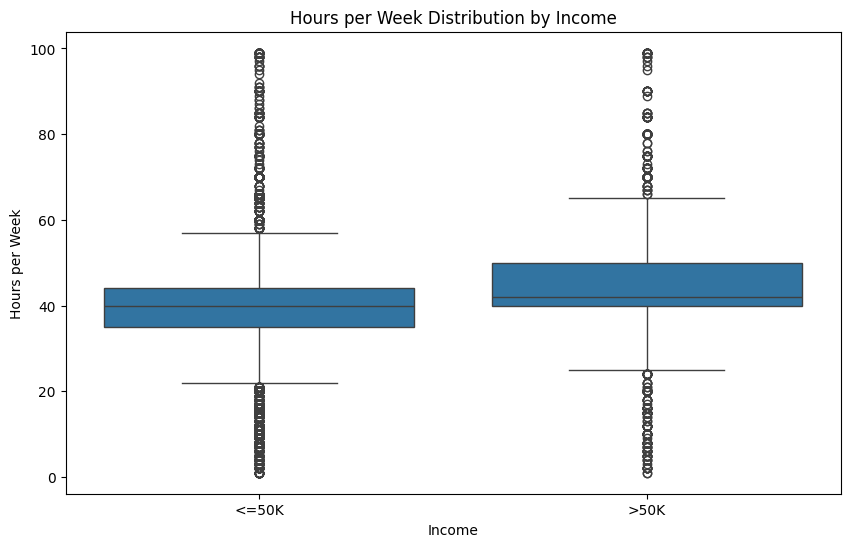

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='hours.per.week', data=df)
plt.title('Hours per Week Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

<Figure size 1000x600 with 0 Axes>

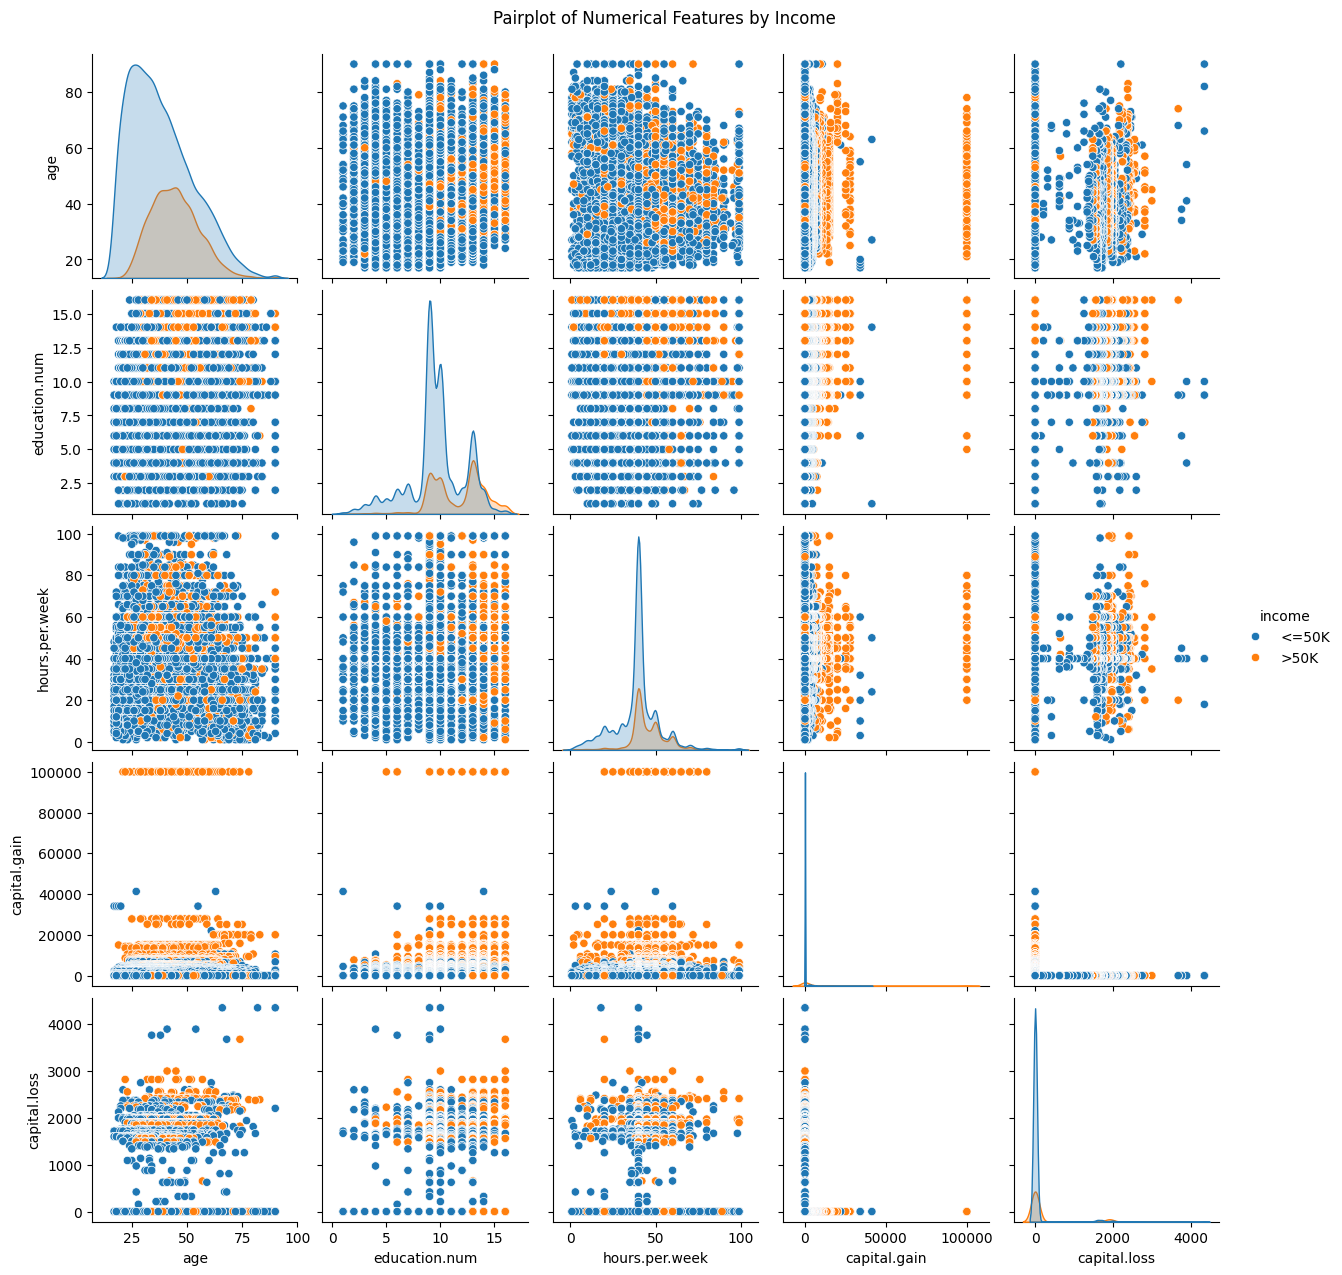

In [27]:
plt.figure(figsize=(10,6))
sns.pairplot(df, hue='income', vars=['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss'])
plt.suptitle('Pairplot of Numerical Features by Income', y=1.02)
plt.show()

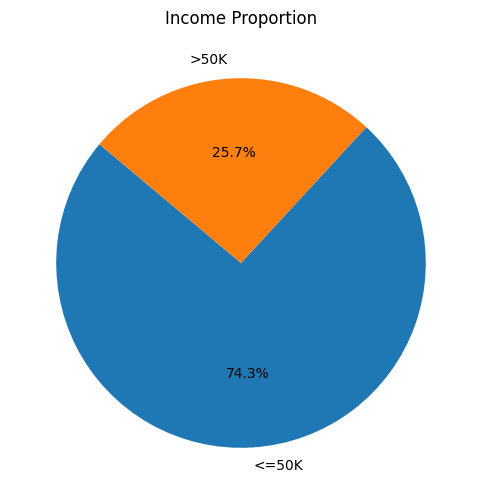

In [28]:
plt.figure(figsize=(10,6))
plt.pie(df['income'].value_counts(), labels=df['income'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Income Proportion')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27682 non-null  int64 
 1   workclass       27682 non-null  object
 2   education.num   27682 non-null  int64 
 3   marital.status  27682 non-null  object
 4   occupation      27682 non-null  object
 5   race            27682 non-null  object
 6   sex             27682 non-null  object
 7   capital.gain    27682 non-null  int64 
 8   capital.loss    27682 non-null  int64 
 9   hours.per.week  27682 non-null  int64 
 10  income          27682 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.3+ MB


In [30]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [32]:
df['occupation'].unique()

array(['Prof-specialty', 'Exec-managerial', 'Machine-op-inspct',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [33]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [34]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])


In [36]:
pickle.dump(le, open('label_encoder_sex.pkl', 'wb'))

In [37]:
df['income'] = le.fit_transform(df['income'])


In [38]:
pickle.dump(le, open('label_encoder_income.pkl', 'wb'))

In [39]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_race_df = pd.DataFrame(ohe.fit_transform(df[['race']]).toarray(), columns=ohe.get_feature_names_out(['race']))
df = pd.concat([df, encoded_race_df], axis=1)
df.drop('race', axis=1, inplace=True)   


In [40]:
pickle.dump(ohe, open('one_hot_race.pkl', 'wb'))

In [41]:
df.isna().sum()

age                        0
workclass                  0
education.num              0
marital.status             0
occupation                 0
sex                        0
capital.gain               0
capital.loss               0
hours.per.week             0
income                     0
race_Amer-Indian-Eskimo    0
race_Asian-Pac-Islander    0
race_Black                 0
race_Other                 0
race_White                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import TargetEncoder
te = TargetEncoder()
df['workclass'] = te.fit_transform(df[['workclass']], df['income'])

In [43]:
pickle.dump(te, open('target_encoder_workclass.pkl', 'wb'))

In [ ]:
df['marital.status'] = te.fit_transform(df[['marital.status']], df['income'])


In [45]:
pickle.dump(te, open('target_encoder_marital.status.pkl', 'wb'))

In [ ]:
df['occupation'] = te.fit_transform(df[['occupation']], df['income'])

In [47]:
pickle.dump(te, open('target_encoder_occupation.pkl', 'wb'))

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      27682 non-null  int64  
 1   workclass                27682 non-null  float64
 2   education.num            27682 non-null  int64  
 3   marital.status           27682 non-null  float64
 4   occupation               27682 non-null  float64
 5   sex                      27682 non-null  int64  
 6   capital.gain             27682 non-null  int64  
 7   capital.loss             27682 non-null  int64  
 8   hours.per.week           27682 non-null  int64  
 9   income                   27682 non-null  int64  
 10  race_Amer-Indian-Eskimo  27682 non-null  float64
 11  race_Asian-Pac-Islander  27682 non-null  float64
 12  race_Black               27682 non-null  float64
 13  race_Other               27682 non-null  float64
 14  race_White            

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22145, 14), (22145,), (5537, 14), (5537,))

In [51]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [52]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [53]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score,f1_score
log=LogisticRegression(class_weight='balanced',
    C=0.5,       
    penalty='l2',
    solver='saga',)
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy Score: 0.8038649087953765
Confusion Matrix: [[3272  840]
 [ 246 1179]]
Recall Score: 0.8273684210526315
Precision Score: 0.5839524517087668
F1 Score: 0.6846689895470384
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.80      0.86      4112
           1       0.58      0.83      0.68      1425

    accuracy                           0.80      5537
   macro avg       0.76      0.81      0.77      5537
weighted avg       0.84      0.80      0.81      5537



C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score,
    roc_auc_score,roc_curve,
    precision_recall_curve,average_precision_score
)
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [55]:
models = {

    # Linear
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=1,solver='saga', class_weight='balanced'),

    # Distance-based
    "KNN": KNeighborsClassifier(n_neighbors=5),

    # SVM
    "SVC": SVC(kernel='rbf', probability=True, random_state=1,max_iter=5000, class_weight='balanced'),

    # Tree
    "Decision Tree": DecisionTreeClassifier(random_state=1),

    # Naive Bayes
    "Naive Bayes": GaussianNB(),

    # Bagging Based
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=1),

    # Boosting
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(max_iter=5000,random_state=1),

    # External Boosting Libraries
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=1,n_estimators=500),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=1),
    "LightGBM": LGBMClassifier(random_state=1)
}

  0%|          | 0/13 [00:00<?, ?it/s]


Logistic Regression Results:

Confusion Matrix:
 [[3272  840]
 [ 246 1179]]


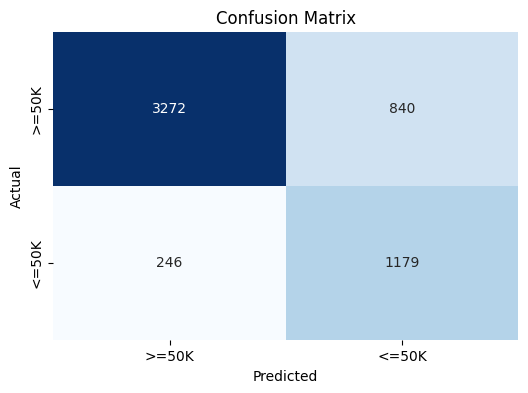


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.93      0.80      0.86      4112
       <=50K       0.58      0.83      0.68      1425

    accuracy                           0.80      5537
   macro avg       0.76      0.81      0.77      5537
weighted avg       0.84      0.80      0.81      5537

ROC-AUC: 0.899477268072906

KNN Results:

Confusion Matrix:
 [[3696  416]
 [ 545  880]]


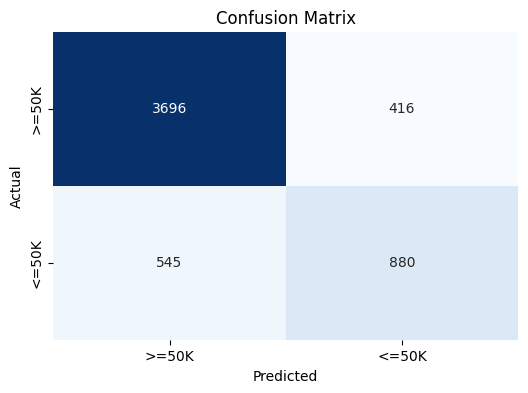


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.87      0.90      0.88      4112
       <=50K       0.68      0.62      0.65      1425

    accuracy                           0.83      5537
   macro avg       0.78      0.76      0.77      5537
weighted avg       0.82      0.83      0.82      5537



 15%|█▌        | 2/13 [00:06<00:33,  3.01s/it]

ROC-AUC: 0.8603014710901769


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\svm\_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



SVC Results:

Confusion Matrix:
 [[ 193 3919]
 [   9 1416]]


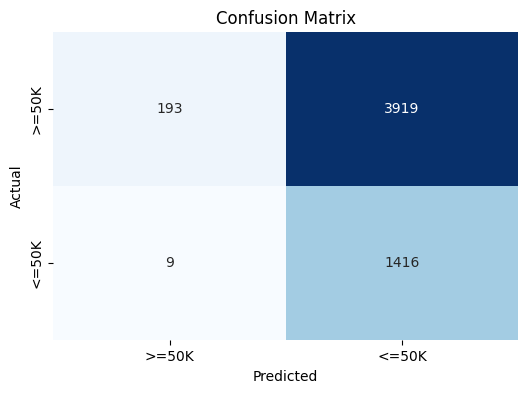


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.96      0.05      0.09      4112
       <=50K       0.27      0.99      0.42      1425

    accuracy                           0.29      5537
   macro avg       0.61      0.52      0.25      5537
weighted avg       0.78      0.29      0.17      5537



 23%|██▎       | 3/13 [00:50<03:21, 20.19s/it]

ROC-AUC: 0.8146876919926275

Decision Tree Results:

Confusion Matrix:
 [[3492  620]
 [ 530  895]]


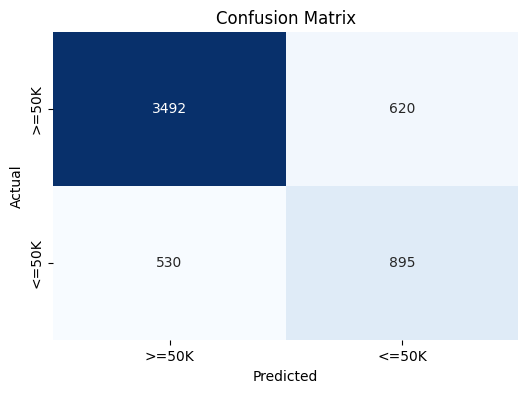

 31%|███       | 4/13 [00:50<01:54, 12.70s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.87      0.85      0.86      4112
       <=50K       0.59      0.63      0.61      1425

    accuracy                           0.79      5537
   macro avg       0.73      0.74      0.73      5537
weighted avg       0.80      0.79      0.79      5537

ROC-AUC: 0.7386007577309031

Naive Bayes Results:

Confusion Matrix:
 [[3688  424]
 [ 598  827]]


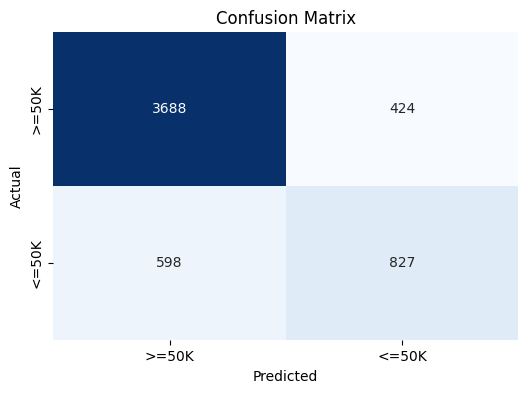


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.86      0.90      0.88      4112
       <=50K       0.66      0.58      0.62      1425

    accuracy                           0.82      5537
   macro avg       0.76      0.74      0.75      5537
weighted avg       0.81      0.82      0.81      5537

ROC-AUC: 0.8679073656904908

Random Forest Results:

Confusion Matrix:
 [[3786  326]
 [ 526  899]]


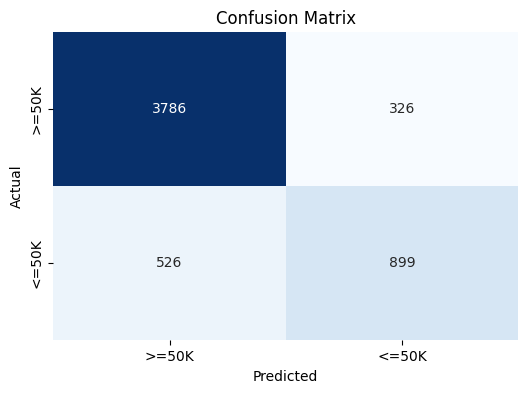

 46%|████▌     | 6/13 [00:51<00:45,  6.56s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.88      0.92      0.90      4112
       <=50K       0.73      0.63      0.68      1425

    accuracy                           0.85      5537
   macro avg       0.81      0.78      0.79      5537
weighted avg       0.84      0.85      0.84      5537

ROC-AUC: 0.9077228821079937

Extra Trees Results:

Confusion Matrix:
 [[3742  370]
 [ 558  867]]


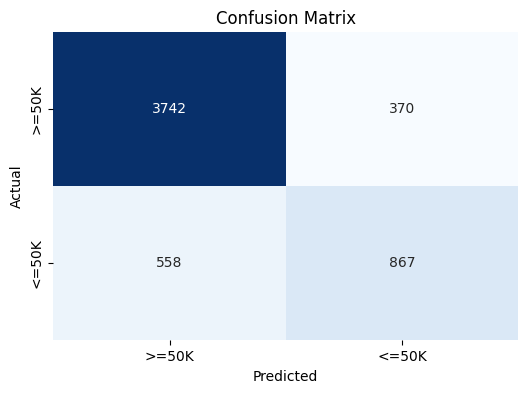

 54%|█████▍    | 7/13 [00:53<00:31,  5.22s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.87      0.91      0.89      4112
       <=50K       0.70      0.61      0.65      1425

    accuracy                           0.83      5537
   macro avg       0.79      0.76      0.77      5537
weighted avg       0.83      0.83      0.83      5537

ROC-AUC: 0.895890760461465

AdaBoost Results:

Confusion Matrix:
 [[3833  279]
 [ 592  833]]


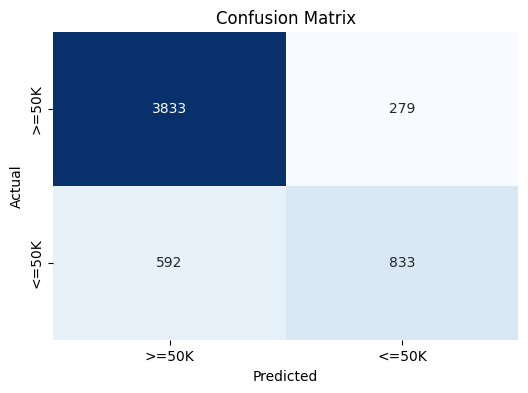

 62%|██████▏   | 8/13 [00:53<00:19,  3.88s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.87      0.93      0.90      4112
       <=50K       0.75      0.58      0.66      1425

    accuracy                           0.84      5537
   macro avg       0.81      0.76      0.78      5537
weighted avg       0.84      0.84      0.84      5537

ROC-AUC: 0.907692504607823

Gradient Boosting Results:

Confusion Matrix:
 [[3858  254]
 [ 526  899]]


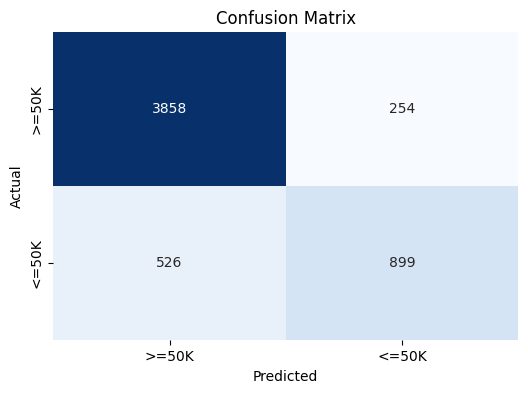

 69%|██████▉   | 9/13 [00:55<00:12,  3.16s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.88      0.94      0.91      4112
       <=50K       0.78      0.63      0.70      1425

    accuracy                           0.86      5537
   macro avg       0.83      0.78      0.80      5537
weighted avg       0.85      0.86      0.85      5537

ROC-AUC: 0.9237273875349854

Hist Gradient Boosting Results:

Confusion Matrix:
 [[3841  271]
 [ 473  952]]


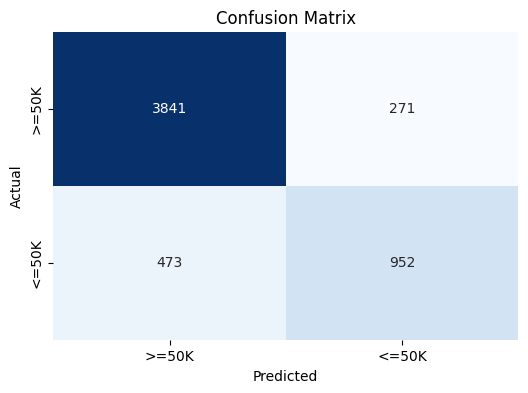

 77%|███████▋  | 10/13 [00:57<00:08,  2.79s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.89      0.93      0.91      4112
       <=50K       0.78      0.67      0.72      1425

    accuracy                           0.87      5537
   macro avg       0.83      0.80      0.82      5537
weighted avg       0.86      0.87      0.86      5537

ROC-AUC: 0.9270578196463922

XGBoost Results:

Confusion Matrix:
 [[3742  370]
 [ 463  962]]


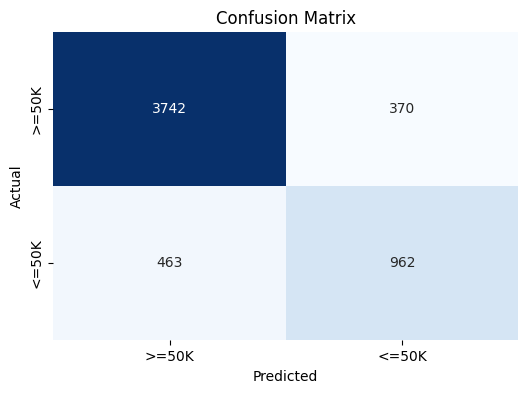

 85%|████████▍ | 11/13 [00:57<00:04,  2.13s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.89      0.91      0.90      4112
       <=50K       0.72      0.68      0.70      1425

    accuracy                           0.85      5537
   macro avg       0.81      0.79      0.80      5537
weighted avg       0.85      0.85      0.85      5537

ROC-AUC: 0.9140082940815072

CatBoost Results:

Confusion Matrix:
 [[3849  263]
 [ 465  960]]


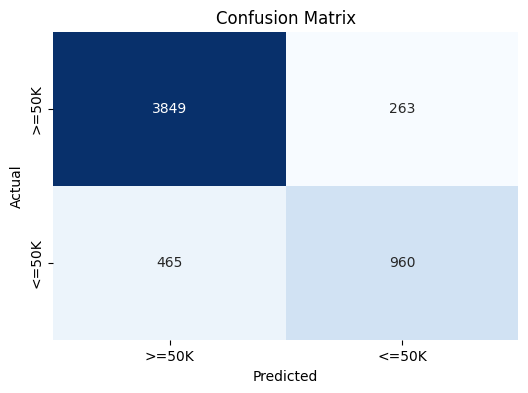

 92%|█████████▏| 12/13 [01:01<00:02,  2.73s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.89      0.94      0.91      4112
       <=50K       0.78      0.67      0.73      1425

    accuracy                           0.87      5537
   macro avg       0.84      0.80      0.82      5537
weighted avg       0.86      0.87      0.87      5537

ROC-AUC: 0.9285087719298245
[LightGBM] [Info] Number of positive: 5701, number of negative: 16444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 22145, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257440 -> initscore=-1.059319
[LightGBM] [Info] Start training from score -1.059319

LightGBM Results:

Confusion Matrix:
 [[3835  277]
 [ 476  949]

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


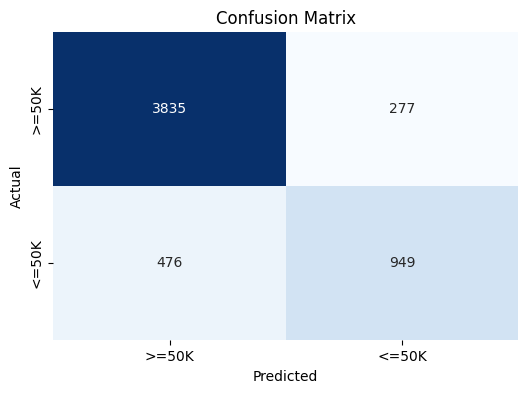

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
100%|██████████| 13/13 [01:02<00:00,  4.78s/it]


Classification Report:

              precision    recall  f1-score   support

       >=50K       0.89      0.93      0.91      4112
       <=50K       0.77      0.67      0.72      1425

    accuracy                           0.86      5537
   macro avg       0.83      0.80      0.81      5537
weighted avg       0.86      0.86      0.86      5537

ROC-AUC: 0.9279290395248823


In [56]:
results = {}

for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)

    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Precision": precision_score(y_train, train_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Train Recall": recall_score(y_train, train_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Train F1 Score": f1_score(y_train, train_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Train Balanced Accuracy": balanced_accuracy_score(y_train, train_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, test_pred)

    }
    print(f"\n{name} Results:")

    cm = confusion_matrix(y_test, test_pred)
    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',cbar=False,
                xticklabels=['>=50K','<=50K']
                ,yticklabels=['>=50K','<=50K'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Full classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, test_pred,target_names=['>=50K','<=50K'],zero_division=0))

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC:", roc_auc)

    

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:200: UserWarning: [21:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Confusion Matrix:
 [[3802  310]
 [ 510  915]]


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


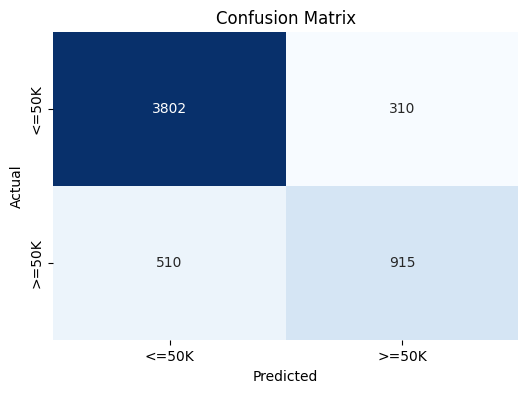


Classification Report:

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4112
       >=50K       0.75      0.64      0.69      1425

    accuracy                           0.85      5537
   macro avg       0.81      0.78      0.80      5537
weighted avg       0.85      0.85      0.85      5537

ROC-AUC: 0.9206665984026212


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [57]:
stack_auto = StackingClassifier(
    estimators=[
        ("lr", models["Logistic Regression"]),
        ("rf", models["Random Forest"]),
        ("nb", models["Naive Bayes"]),
        ("lgbm", models["LightGBM"]),

        
    ],
    final_estimator=XGBClassifier(max_iter=5000),
    stack_method="predict_proba",   # best for classification usually
    n_jobs=-1
)

# Train
stack_auto.fit(X_train, y_train)

# Predictions
stack_auto_train_pred = stack_auto.predict(X_train)
stack_auto_test_pred  = stack_auto.predict(X_test)
results["Stacking Classifier "] = {
    "Train Accuracy": accuracy_score(y_train, stack_auto_train_pred),
    "Test Accuracy": accuracy_score(y_test, stack_auto_test_pred),
    "Train Precision": precision_score(y_train, stack_auto_train_pred),
    "Test Precision": precision_score(y_test, stack_auto_test_pred),
    "Train Recall": recall_score(y_train, stack_auto_train_pred),
    "Test Recall": recall_score(y_test, stack_auto_test_pred),
    "Train F1 Score": f1_score(y_train, stack_auto_train_pred),
    "Test F1 Score": f1_score(y_test, stack_auto_test_pred),
    "Train Balanced Accuracy": balanced_accuracy_score(y_train, stack_auto_train_pred),
    "Test Balanced Accuracy": balanced_accuracy_score(y_test, stack_auto_test_pred)
}
cm = confusion_matrix(y_test, stack_auto_test_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',cbar=False,
             xticklabels=['<=50K','>=50K']
            ,yticklabels=['<=50K','>=50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, stack_auto_test_pred,target_names=['<=50K','>=50K'],zero_division=0))

y_pred_prob = stack_auto.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC:", roc_auc)



In [58]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test Set Performance with Best Hyperparameters:")
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, y_test_pred)}")
print(f"Precision Score: {precision_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")
print(f"Classification Report: {classification_report(y_test, y_test_pred)}")



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 5701, number of negative: 16444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 22145, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257440 -> initscore=-1.059319
[LightGBM] [Info] Start training from score -1.059319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [59]:
light=LGBMClassifier(learning_rate=0.1, max_depth=7, n_estimators=300, random_state=1)
light.fit(X_train, y_train)
y_pred=light.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")


[LightGBM] [Info] Number of positive: 5701, number of negative: 16444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 22145, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257440 -> initscore=-1.059319
[LightGBM] [Info] Start training from score -1.059319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [60]:
pickle.dump(light, open('model.pkl', 'wb'))

In [61]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Test F1 Score", ascending=False)

In [62]:
results_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train Balanced Accuracy,Test Balanced Accuracy
CatBoost,0.891894,0.868521,0.842694,0.784955,0.713208,0.673684,0.772563,0.725076,0.833526,0.804863
Hist Gradient Boosting,0.874283,0.865631,0.805445,0.778414,0.674618,0.668070,0.734250,0.719033,0.809062,0.801083
LightGBM,0.880695,0.864006,0.817389,0.774062,0.690931,0.665965,0.748859,0.715956,0.818708,0.799301
XGBoost,0.968300,0.849558,0.952398,0.722222,0.922996,0.675088,0.937467,0.697860,0.953501,0.792554
Gradient Boosting,0.861188,0.859129,0.792344,0.779705,0.624452,0.630877,0.698450,0.697440,0.783857,0.784553
Stacking Classifier,0.834274,0.851905,0.718246,0.746939,0.586213,0.642105,0.645548,0.690566,0.753244,0.783358
Logistic Regression,0.795891,0.803865,0.572445,0.583952,0.818453,0.827368,0.673693,0.684669,0.803261,0.811544
Random Forest,0.999684,0.846126,0.999824,0.733878,0.998948,0.630877,0.999386,0.678491,0.999443,0.775799
AdaBoost,0.844434,0.842695,0.765662,0.749101,0.570251,0.584561,0.653664,0.656681,0.754871,0.758356
Extra Trees,0.999774,0.832400,1.000000,0.700889,0.999123,0.608421,0.999561,0.651390,0.999561,0.759220


<Axes: >

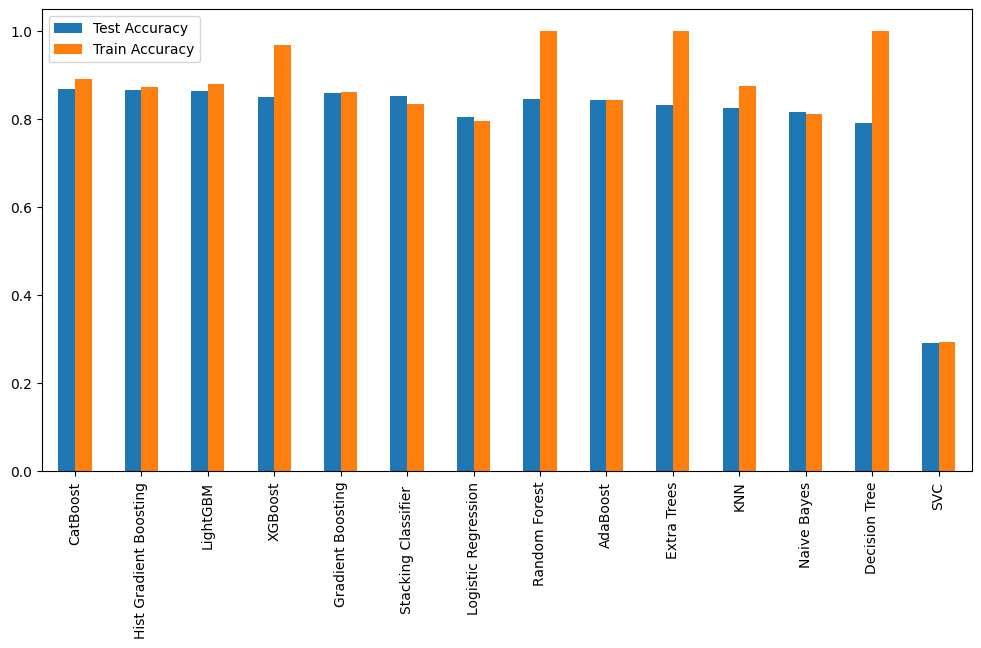

In [ ]:
results_df[["Test Accuracy", "Train Accuracy"]].plot.bar(figsize=(12,6))

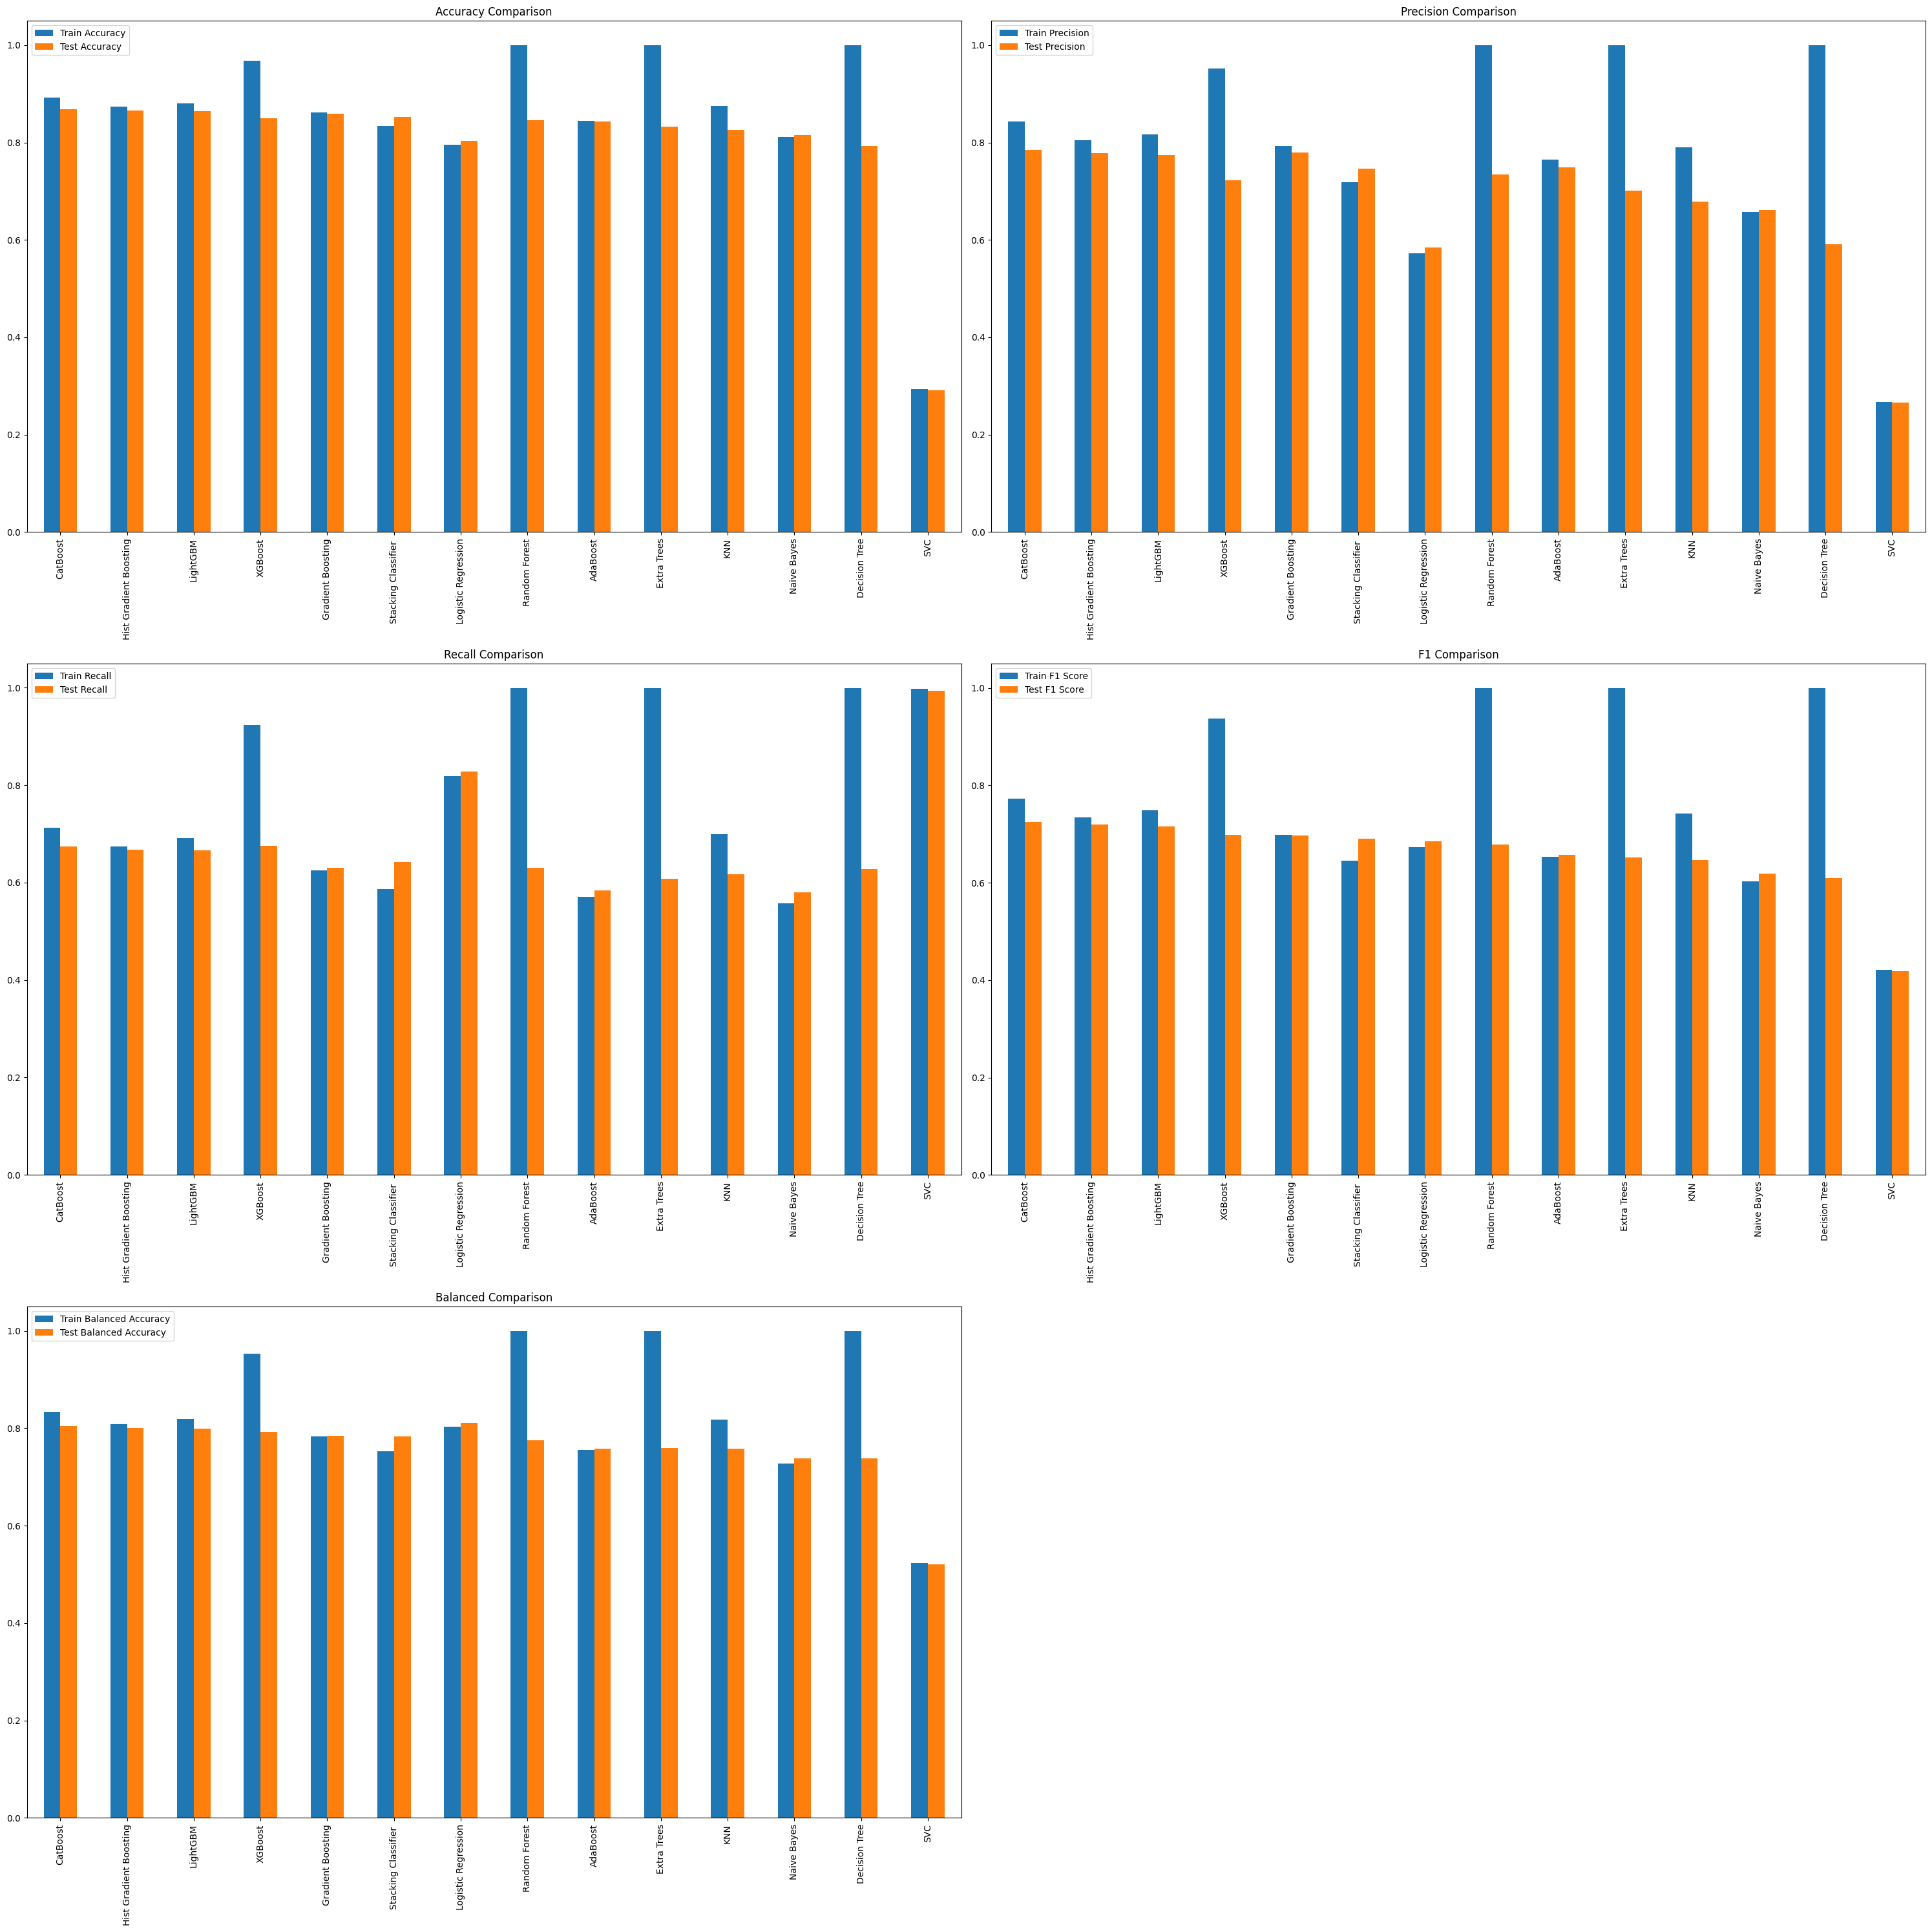

In [ ]:
cols = [
    ['Train Accuracy', 'Test Accuracy'],
    ['Train Precision', 'Test Precision'],
    ['Train Recall', 'Test Recall'],
    ['Train F1 Score', 'Test F1 Score'],
    ["Train Balanced Accuracy", "Test Balanced Accuracy"]
]

plt.figure(figsize=(30,30))

for i, col in enumerate(cols):
    ax = plt.subplot(3, 2, i+1)   
    results_df[col].plot.bar(ax=ax)   
    ax.set_title(col[0].split(" ")[1] + ' Comparison')

plt.tight_layout()
plt.show()